# Wormy (A Snake Rip-Off)

The player will start by controlling a small worm around the screen. The player cannot stop or slow down, but can control the direction. Bricks will appear randomly. The player moves and eats the bricks. The worm grows longer each brick it eats. The game is over if the worm eats itself or crashes into the edge of the screen.

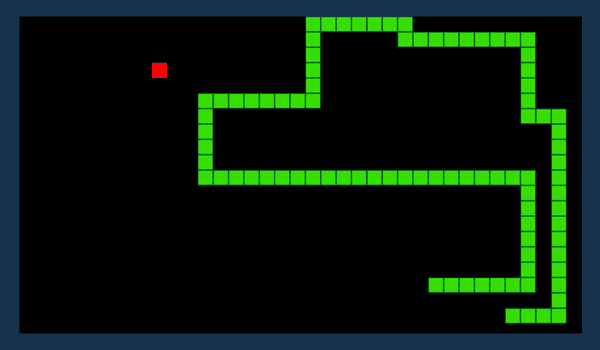

The grid: a grid will be made to place the worm and brick. We can think of the grid with each cell a "point" on a certesian coordinate system. The grid(0,0) is in the top left cell and (31,23) is the bottom right cell.

In [1]:
import random,sys,pygame
from pygame.locals import *

pygame 2.1.0 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
Fps=15
WinWidth=640
WinHeight=480
CellSize=20
assert WinWidth % CellSize == 0, 'Window width must be a multiple of cell size'
assert WinHeight % CellSize == 0, 'Window height must be a multiple of cell size'
CellWidth=int(WinWidth/CellSize)
CellHeight=int(WinHeight/CellSize)
#       R   G   B
White=(255,255,255)
Black=(0,   0,   0)
Red=(255,   0,   0)
Green=(44, 201, 52)
DarkGreen=(35,97,40)
DarkGray=(52,56,52)
BGColor=Black
Up='up'
Down='down'
Left='left'
Right='right'

Head=0 #index of worm's head

def main():
    global FpsClock,DisplaySurf,BasicFont
    pygame.init()
    FpsClock=pygame.time.Clock()
    DisplaySurf=pygame.display.set_mode((WinWidth,WinHeight))
    BasicFont=pygame.font.Font("freesansbold.ttf",18)
    pygame.display.set_caption("Wormy")
    
def ShowStartScreen():
    while True:
        RunGame()
        ShowGameOverScreen()
        
def RunGame():
    #set a starting point
    StartX=random.randint(5,(CellWidth-6))
    StartY=random.randint(5,(CellHeight-6))
    WormCoords=[{'x': StartX, 'y': StartY},
                {'x': StartX-1, 'y': StartY},
                {'x': StartX-2, 'y': StartY}
               ]
    Direction=Right
    Apple=getRandomLocation()
    while True:
        for event in pygame.event.get():
            if event.type==QUIT:
                terminate()
            elif event.type==KEYDOWN:
                if(event.key==K_LEFT or event.key==K_a) and Direction !=Right:
                    Direction=Left
                elif(event.key==K_RIGHT or event.key==K_d) and Direction !=Left:
                    Direction=Right
                elif(event.key==K_DOWN or event.key==K_s) and Direction !=Up:
                    Direction=Down
                elif(event.key==K_UP or event.key==K_w) and Direction !=Down:
                    Direction=Up
                elif event.key==K_Escape:
                    terminate()
                    
#we set a direction to be right. The worm will start by moving right

#collision detection:

#we can check if the worm has moved off the grid by seeing if either the x coordinate of the head is -1 (which is past the
#left or if the worm has gone past the width)
    if WormCoords[Head]['x']==-1 or WormCoords[Head]['x']==CellWidth or WormCoords[Head]['y']==-1 or WormCoords[Head]['y']==CellHeight:
        return #game over
    for WormBody in WormCoords[1:]:
        if WormBody['x']==WormCoords[Head]['x'] and WormBody['y']==WormCoords[Head]['y']:
            return #game over
    
#the worm has crashed when the head has moved off the edge of the grid or when the worm head moves into a cell that
#is alreadyoccupied by another body segment

#detecting collision with apples
    if WormCoords[Head]['x']==Apple['x'] and WormCoords[Head]['y']==Apple['y']:
        #don't remove tail segment
        Apple=getRandomLocation() #set a new apple
    else:
        del WormCoords[-1] #remove worm's tail segment
        
#if the head has not collided with the apple, then we delete the last body segment in the wormCoords list. -1 is an index count
#from the end of the list

#move the worm. To move the worm we are going to add a new segment to the beginning of WormCoords.
#this new segment willl be the head
    if Direction == Up:
        NewHead={'x': WormCoords[Head]['x'],'y':WormCoords[Head]['y']-1}
    elif Direction == Down:
        NewHead={'x':WormCoords[Head]['x'],'y':WormCoords[Head]['y']+1}
    elif Direction == Left:
        NewHead={'x':WormCoords[Head]['x']-1,'y':WormCoords[Head]['y']}
    elif Direction == Right:
        NewHead={'x':WormCoords[Head]['x']+1,'y':WormCoords[Head]['y']}
    WormCoords.insert(0,NewHead)
    
#display the new screen
    DisplaySurf.fill(BGColor)
    drawGrid()
    drawWorm(WormCoords)
    drawApple(Apple)
    drawScore(len(WormCoords)-3)
    pygame.display.update()
    FpsCLock.tick(Fps)


In [3]:
#press a key text
def drawPressKeyMsg():
    pressKeysurf=BasicFont.render("Press a key to play",True,DarkGray)
    pressKeyRect==pressKeySurf.get.rect()
    pressKeyRect.topleft=(WinWidth-200, WinHeight-30)
    DisplaySurf.blit(pressKeySurf, pressKeyRect)

In [4]:
#check for key press
def checkForKeypress():
    if len(pygame.event.get(QUIT))>0:
        terminate()
    keyUpEvents=pygame.event.get(KEYUP)
    if len(keyUpEvents)==0:
        return None
    if keyUpEvent[0].key==K_ESCAPE:
        terminate()
    return keyUpEvents[0].key
#this function checks if the quit events in the event queue
#check if the event is empty
#check to see if we escape
        

In [5]:
#start up screen
def showStartScreen():
    titleFont=pygame.font.Font('freesansbold.ttf',100)
    titleSurf1=titleFont.render("Wormy",True,White,DarkGreen)
    titleSurf2=titleFont.render("Wormy",True,Green)
    
    degree1=0
    degree2=0
    while True:
        DisplaySurf.fill(BGColor)
        rotatedSurf1=pygame.transform.rotate(titleSurf1.degree1)
        rotatedRect1=rotatedSurf1.get.rec()
        rotatedRect.center=(WinWidth/2 . WinHeight/2)
        DisplaySurf.blit(rotatedSurf1,rotatedRect1)
        rotatedSurf2=pygame.transform.rotate(titleSurf2.degree2)
        rotatedRect2=rotatedSurf2.get.rec()
        rotatedRect.center=(WinWidth/2 . WinHeight/2)
        DisplaySurf.blit(rotatedSurf2,rotatedRect2)
        
        drawPressKeyMsg()
        if checkForKeyPress():
            pygame.event.get()
            return
        pygame.display.update()
        FpsClock.tick(Fps)
        degree1 +=3
        degree2 +=7
        

In [6]:
def terminate():
    pygame.quit()
    sys.exit()

In [7]:
# where the apple appears

def getRandomLocation():
    return {'x':random.randint(0,CellWidth-1),'y':randomramdomt(0,CellHeight-1)}

In [8]:
#game over screen
def ShowGameOverScreen():
    gameOverFont=pygame.font.Font('freesansbold.ttf',150)
    gameSurface=gameOverFont.render('GAME',True,White)
    overSurf=gameOverFont.render('OVER',True,Red)
    gameRect=gameSurf.get_rect()
    overRect=overSurf.get_rect()
    gameRect.midtop=(WinWidth / 2, 10)
    overRect.midtop=(WinWidth / 2, gameRect.height+35)
    DisplaySurf.blit(gameSurf,gameRect)
    DisplaySurf.blit(overSurf,overRect)
    drawPressKeyMsg()
    pygame.display.update()
    pygame.time.wait(500)
    checkForKeyPress()
    while True:
        if checkForKeyPress():
            pygame.event.get()
            return

In [9]:
#drawing functions

def drawScore(score):
    scoreSurf=BasicFont.render("Score: %s" %(score), True, White)
    scoreRect=scoreSurf.get_rect()
    scoreRect.topLeft=(WinWidth-120,10)
    DisplaySurf.blit(scoreSurf,scoreRect)
def drawWorm(WormCoords):
    for coord in wormCoords:
        x=coord['x']*CellSize
        y=coord['y']*CellSize
        wormSegmentRect=pygame.Rect(x,y,CellSize,CellSize)
        wormInnerSegmentRect = pygame.Rect(x+4,y+4,CellSize,CellSize)
        pygame.draw.rect(DisplaySurf,Green,wormInnerSegmentRect)
def drawApple(coord):
    x=coord['x']*CellSize
    y=coord['y']*CellSize
    appleRect=pygame.Rect(x,y,CellSize)
    pygame.draw.rect(DisplaySurf,Red,appleRect)
def drawGrid():
    for x in range(0,WinWidth,CellSize):
        pygame.draw.line(DisplaySurf, DarkGray, (x,0),(x,WinHeight))
    for y in range(0,WinHeight,CellSize):
        pygame.draw.line(DisplaySurf, DarkGray, (0,y),(WinWidth,y))
        
if __name__ == '__main__':
    main()